In [1]:
# to be run on GPU enabled device or Colab
#!pip install --upgrade qaravan

In [ ]:
from qaravan.applications import brickwall_skeleton
from qaravan.core import two_local_circ
from qaravan.tensorQ import StatevectorSim
from plotting import set_style
import torch
import time
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def gpu_benchmark(max_n, num_layers=1, backend="torch"):
    gpu_times, cpu_times = [], []
    for n in tqdm(range(2, max_n, 2)):
      skeleton = brickwall_skeleton(n, num_layers)
      circ = two_local_circ(skeleton)

      # GPU benchmark
      start_gpu = time.time()
      sim_gpu = StatevectorSim(circ, backend=backend, device="cuda")
      sim_gpu.run(progress_bar=False)
      torch.cuda.synchronize()
      end_gpu = time.time()

      # CPU benchmark
      start_cpu = time.time()
      sim_cpu = StatevectorSim(circ, backend=backend, device="cpu")
      sim_cpu.run(progress_bar=False)
      end_cpu = time.time()

      gpu_times.append(end_gpu - start_gpu)
      cpu_times.append(end_cpu - start_cpu)

    return gpu_times, cpu_times


In [4]:
gpu_times, cpu_times = gpu_benchmark(28)

  0%|          | 0/13 [00:00<?, ?it/s]

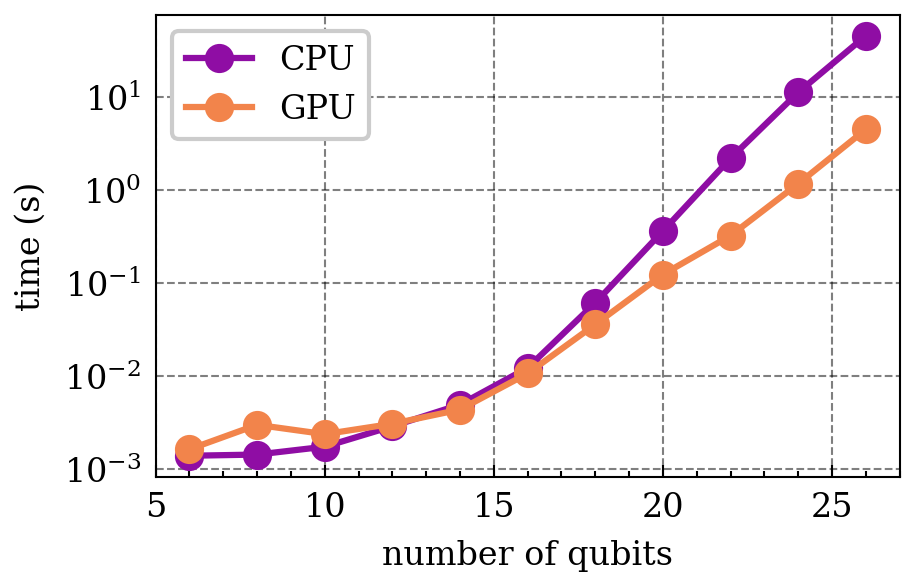

In [7]:
n_range = np.arange(2,28,2)

set_style()
fig, ax = plt.subplots(figsize=(3.2,2))
colors = plt.cm.plasma(np.linspace(0.3,0.7,2))

plt.plot(n_range[2:], cpu_times[2:], label='CPU', marker='o', color=colors[0])
plt.plot(n_range[2:], gpu_times[2:], label='GPU', marker='o', color=colors[1])
plt.xlabel('number of qubits')
plt.ylabel('time (s)')
plt.legend()
plt.yscale('log')